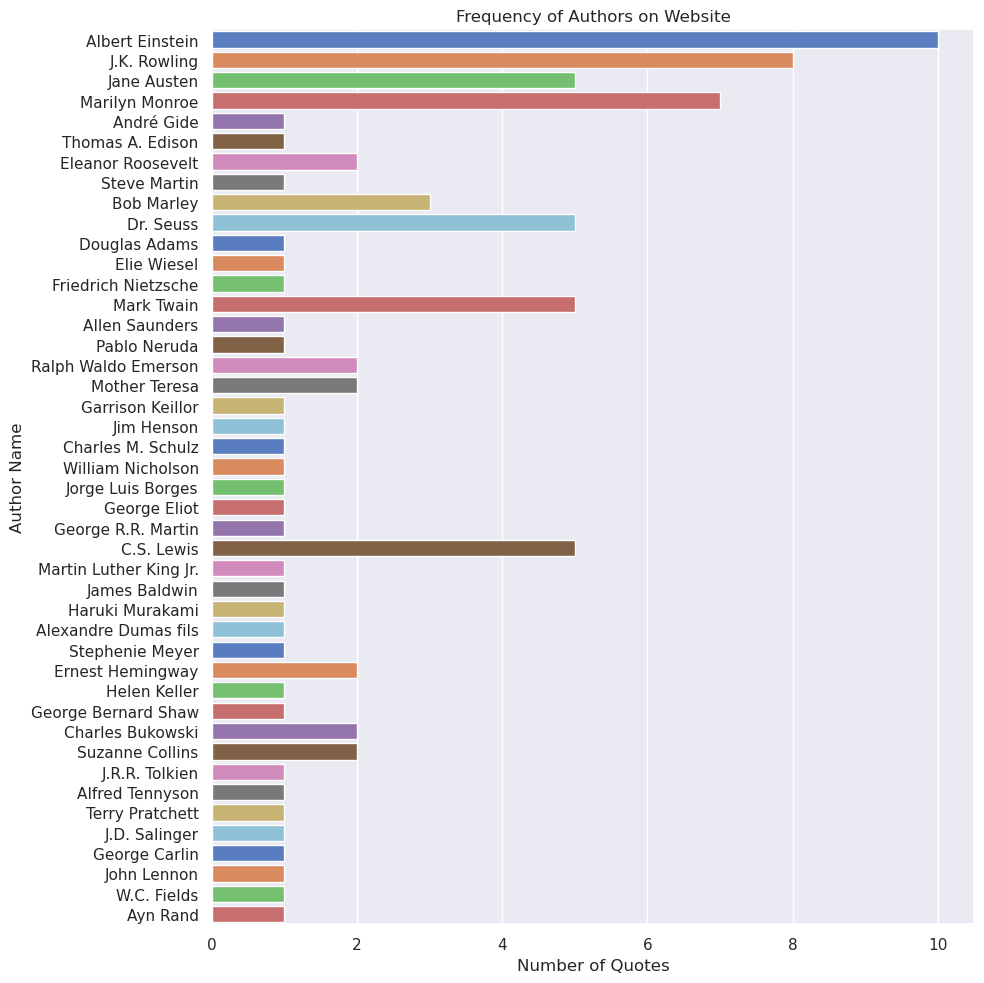

In [53]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as pit
import seaborn as sns
from collections import Counter

url = "http://quotes.toscrape.com/page/{}/"
authors = []

for page in range(1,10):
    url1 = url.format(page)
    response = requests.get(url1)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    quotes = soup.find_all('div', class_='quote')
    for quote in quotes:
        author = quote.find('small', class_='author').text
        authors.append(author)

counts = Counter(authors)

names = list(counts.keys())
values = list(counts.values())

sns.set(style="darkgrid")
pit.figure(figsize=(10,10))
sns.barplot(x=values, y=names, palette="muted")
pit.title("Frequency of Authors on Website")
pit.xlabel("Number of Quotes")
pit.ylabel("Author Name")
pit.tight_layout()
pit.show()
